## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [4]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv
import numpy as np

#project_home = '/home/camachocm2/Analysis/EmoGrow/temperament/'
project_home = '/home/camachocm2/Analysis/aggregate_anats/misc/'
#data_file = 'emogrow_cbq.csv'
data_file = project_home + 'subject_data.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,14:29]
cbq_data.describe()

,activity_level,anger_frustration,approach,attention_focusing,discomfort,soothability,fear,high_intensity_pleasure,impulsivity,inhibitory_control,low_intensity_pleasure,perceptual_sensitivity,sadness,shyness,smiling_laughter
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,4.554847,4.135446,4.991101,4.745506,4.053571,4.489554,3.656274,4.519375,4.261905,4.752976,5.247396,5.159226,4.167139,3.544702,5.376518
std,1.036872,1.573917,0.923782,1.219858,1.129993,1.176050,1.397566,1.269470,0.968398,1.133259,1.167233,0.989026,1.001377,1.198024,0.785517
min,2.142857,1.000000,2.500000,1.000000,1.333333,1.333333,0.833333,1.666667,2.000000,1.833333,2.000000,2.000000,1.428571,1.000000,2.666667
25%,3.857143,3.000000,4.333333,4.000000,3.166667,3.666667,2.500000,3.791667,3.500000,3.958333,4.500000,4.500000,3.571429,2.666667,4.833333
50%,4.571429,3.833333,5.000000,4.833333,3.833333,4.666667,3.500000,4.666667,4.250000,4.833333,5.500000,5.333333,4.142857,3.666667,5.500000
75%,5.285714,5.541667,5.666667,5.708333,4.833333,5.500000,4.541667,5.541667,4.833333,5.500000,6.125000,5.833333,4.857143,4.333333,6.000000
max,6.714286,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.833333,6.666667,7.000000,7.000000,7.000000,6.571429,6.333333,7.000000


In [5]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,approach_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std,smiling_laughter_std
count,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02
mean,3.687526e-16,5.947623e-18,-1.427430e-16,-1.110223e-16,1.586033e-17,3.251367e-16,1.070572e-16,-2.696256e-16,1.506731e-16,3.330669e-16,-5.709718e-16,6.542386e-16,-1.308477e-16,2.061843e-16,-4.044384e-16
std,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00,1.004494e+00
min,-2.336672e+00,-2.001083e+00,-2.708752e+00,-3.084245e+00,-2.418123e+00,-2.695809e+00,-2.028976e+00,-2.257265e+00,-2.346216e+00,-2.587904e+00,-2.794635e+00,-3.208637e+00,-2.747094e+00,-2.133630e+00,-3.465271e+00
25%,-6.759173e-01,-7.246567e-01,-7.152380e-01,-6.138885e-01,-7.884030e-01,-7.028489e-01,-8.310666e-01,-5.758144e-01,-7.903042e-01,-7.043531e-01,-6.431918e-01,-6.695366e-01,-5.975650e-01,-7.361973e-01,-6.946071e-01
50%,1.606391e-02,-1.928125e-01,9.676350e-03,7.232164e-02,-1.957775e-01,1.512768e-01,-1.123211e-01,1.165476e-01,-1.234831e-02,7.122669e-02,2.173854e-01,1.768302e-01,-2.435736e-02,1.022621e-01,1.579050e-01
75%,7.080449e-01,8.974681e-01,7.345906e-01,7.928423e-01,6.931607e-01,8.630483e-01,6.363721e-01,8.089096e-01,5.927282e-01,6.621446e-01,7.552461e-01,6.846502e-01,6.921522e-01,6.612351e-01,7.972891e-01
max,2.092007e+00,1.828196e+00,2.184419e+00,1.856468e+00,2.619194e+00,2.144237e+00,2.403288e+00,1.830968e+00,2.494398e+00,1.991710e+00,1.508251e+00,1.869564e+00,2.411775e+00,2.338154e+00,2.076057e+00


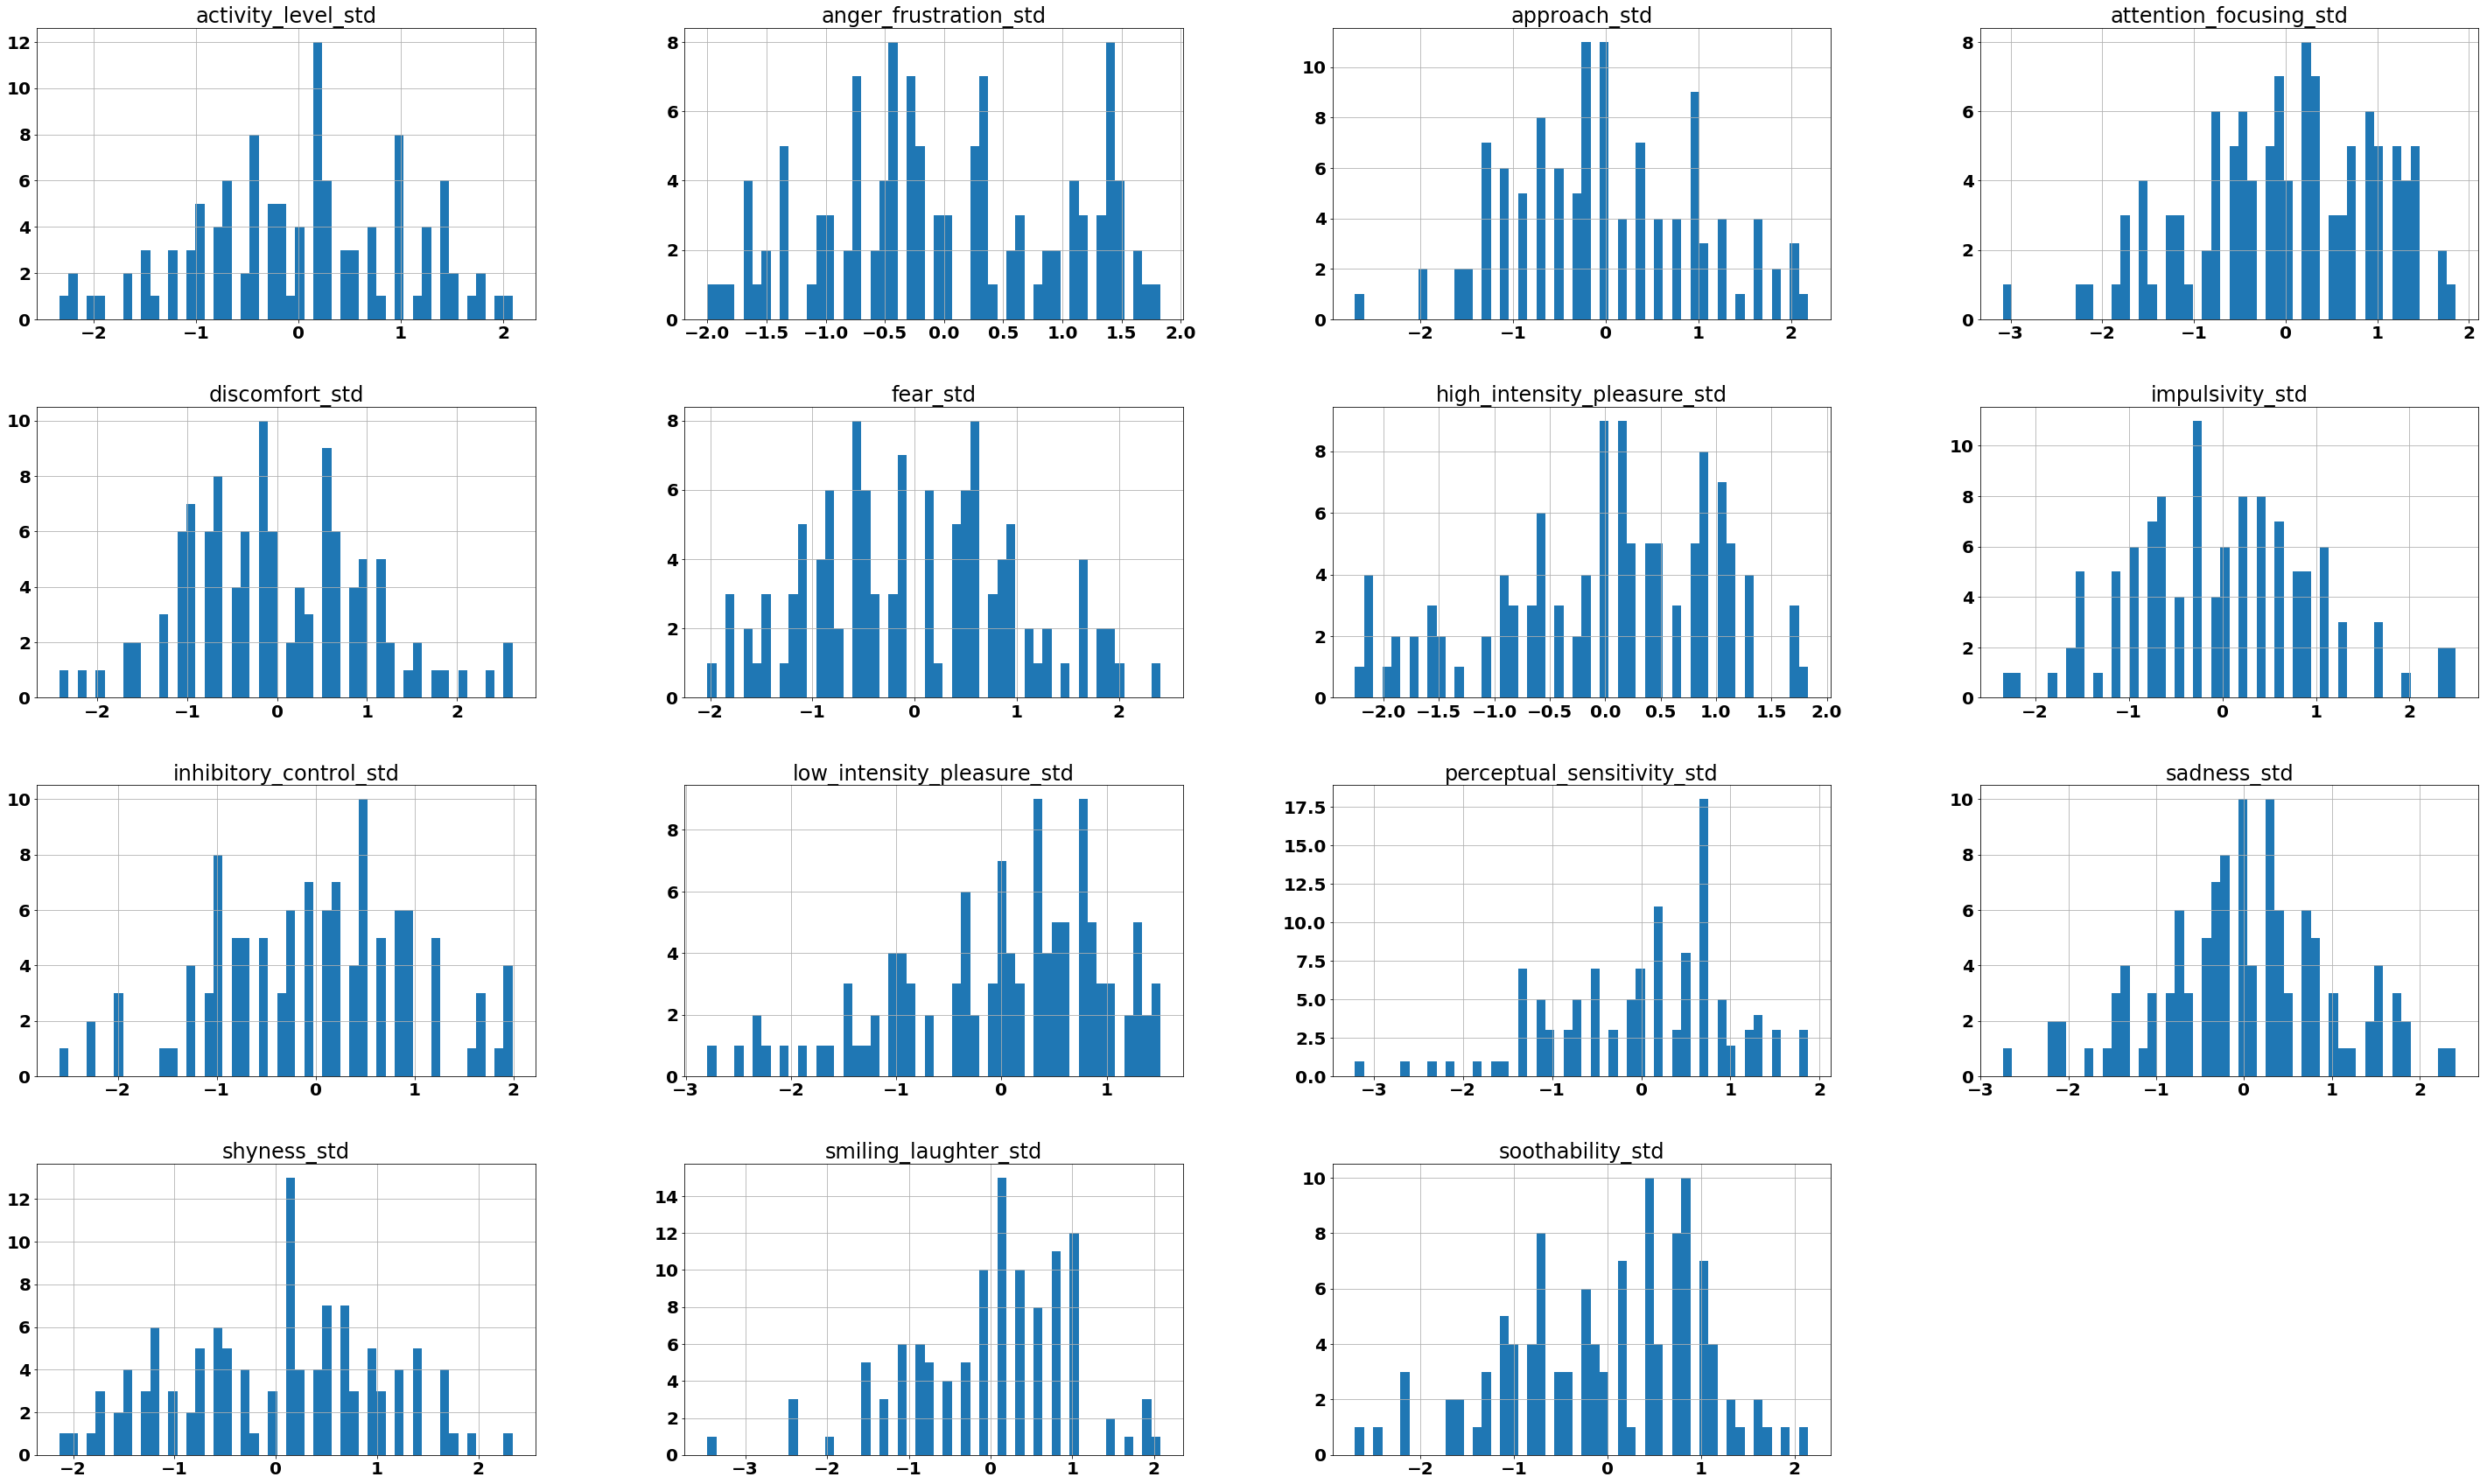

In [7]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
std_cbq_data.hist(bins=50, figsize=(50,30))
plt.show()

In [8]:
# Decompose the data down to the principle components capturing 95% of the variance
from sklearn.decomposition import PCA
from numpy import sum

pca = PCA(random_state=0)
pca_fit = pca.fit_transform(std_cbq)
cbq_back=pca.inverse_transform(pca_fit)
#print(pca.components_)
print(pca.explained_variance_ratio_)
cbq_components = cbq_back[:,:3]
cbq_components.shape

[0.31777557 0.13864367 0.12037608 0.0695616  0.06318417 0.0527204
 0.03936397 0.03714145 0.03382427 0.03172901 0.02633536 0.02252154
 0.02110344 0.01394039 0.01177909]


(112, 3)

silhouette average for 2 clusters:0.3387119887799209
[-0.56755814  0.78492083] [-0.52285688  0.72309994]


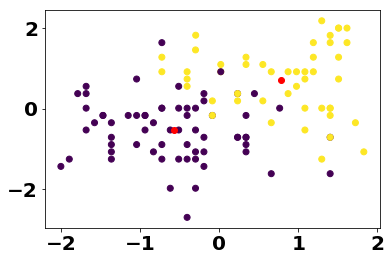

[65 47]
silhouette average for 3 clusters:0.26144648744617943
[-1.00186039  0.10543737  0.98871739] [-0.68228726 -0.12891028  1.03892513]


<Figure size 2880x720 with 0 Axes>

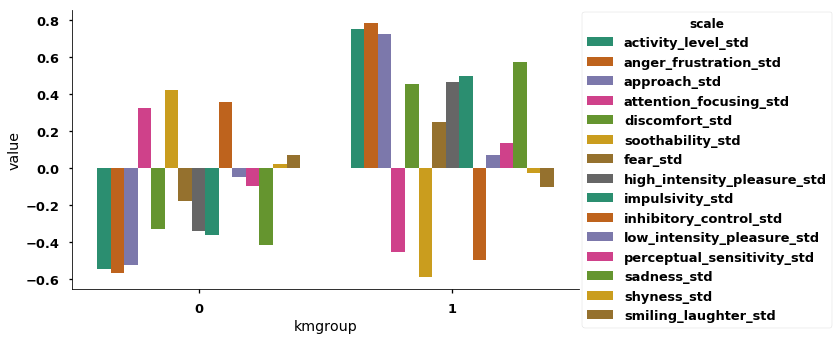

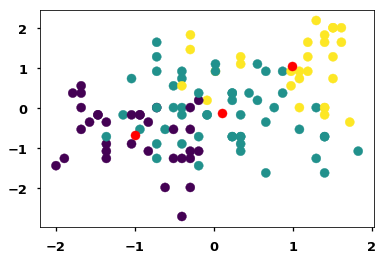

[33 51 28]
silhouette average for 4 clusters:0.2805986020114167
[ 0.63154601 -0.91375691  1.08369542 -0.6834817 ] [-0.32689099 -0.90317864  1.0902168   0.16752046]


<Figure size 2880x720 with 0 Axes>

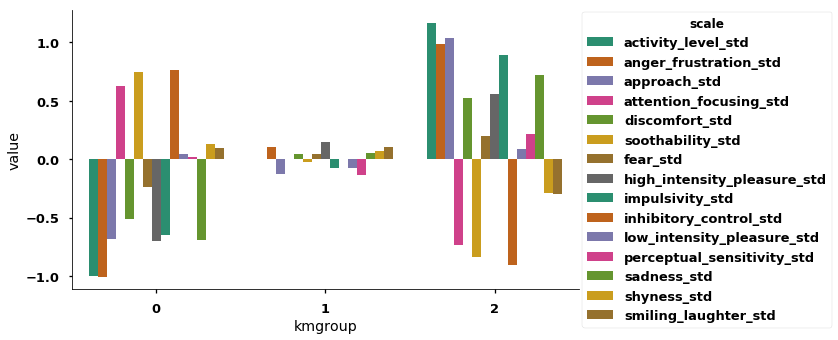

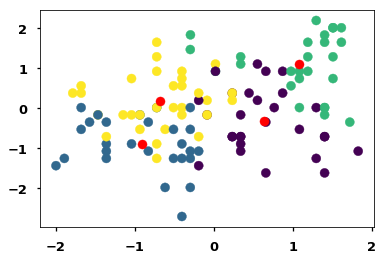

[28 27 26 31]
silhouette average for 5 clusters:0.2571142166289118
[-0.89059214  0.85700171 -0.48689109  1.02165375 -0.59516424] [-0.97620704 -0.62068388 -0.12891041  1.24067136  0.48244651]


<Figure size 2880x720 with 0 Axes>

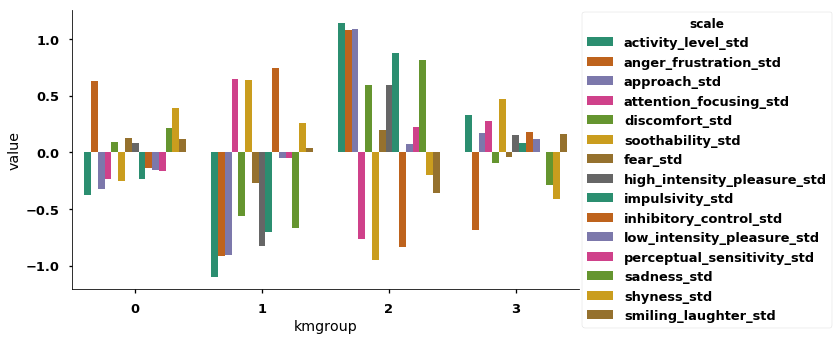

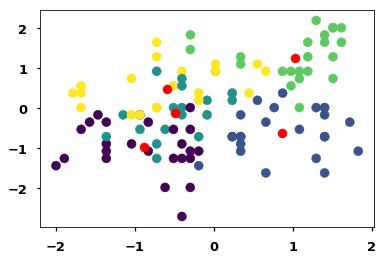

[25 23 17 24 23]
silhouette average for 6 clusters:0.2846011277872588
[ 0.52722272 -0.51585864 -0.03046008  0.97145356 -1.28689206  1.22797131] [ 0.52548069  0.08351007 -1.26846195  1.45970621 -0.41319029 -0.18449711]


<Figure size 2880x720 with 0 Axes>

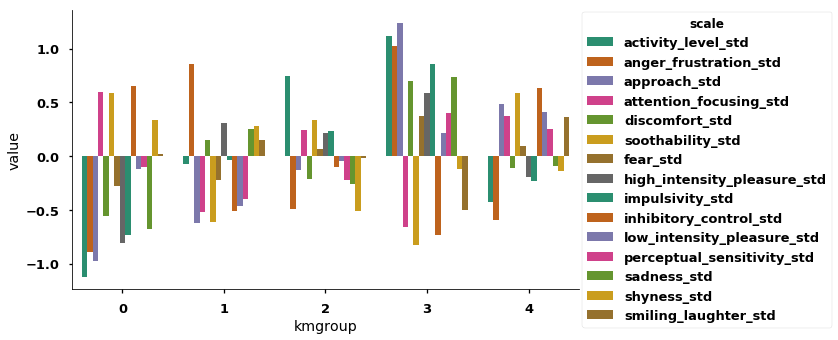

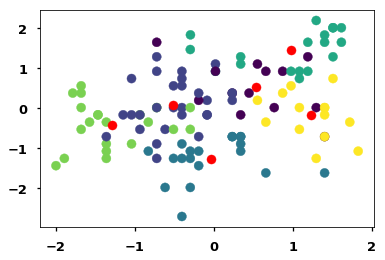

[13 27 19 18 21 14]


<Figure size 2880x720 with 0 Axes>

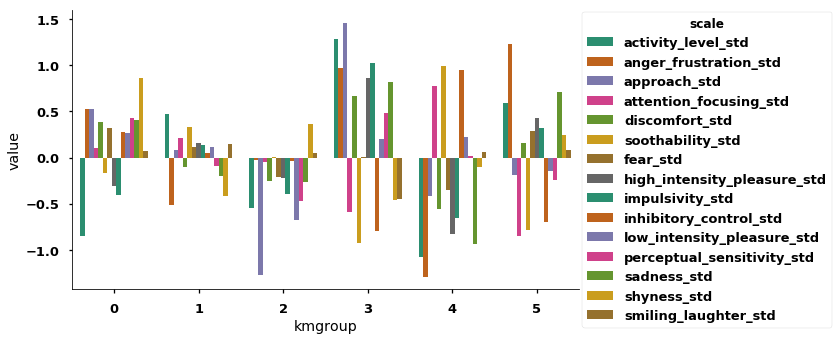

In [9]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique

for n in [2,3,4,5,6]:
#for n in [3]:
    kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(cbq_components)
    silhouette_avg = silhouette_score(cbq_components, kmeans.fit_predict(cbq_components))
    print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))

    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers[:,1],cluster_centers[:,2])
    plt.figure()
    plt.scatter(cbq_components[:,1],cbq_components[:,2], c=kmeans.labels_)
    plt.scatter(cluster_centers[:,1],cluster_centers[:,2], c='red')
    plt.savefig(project_home + str(n) + 'component_scatter.png')
    plt.show()
    
    groups = kmeans.labels_
    std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
    all_data = data.join(std_cbq_data)
    all_data.to_csv(project_home + str(n) + 'kmeans_group_data.csv')

    group_names, group_ns = unique(groups, return_counts=True)
    print(group_ns)

    std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
    std_cbq_data_m.to_csv(project_home + str(n) + 'kmeans_group_summary_data.csv')
    # Visualize the new groups
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pandas import melt
    font = {'weight' : 'bold',
            'size'   : 10}

    matplotlib.rc('font', **font)
    sns.set_context("talk")

    long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                        value_vars=['activity_level_std', 'anger_frustration_std', 'approach_std',
                                    'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                    'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                    'inhibitory_control_std', 'low_intensity_pleasure_std',
                                    'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                    'smiling_laughter_std'], 
                        var_name='scale',
                        value_name='value')
    #long_std_cbq
    plt.figure(figsize=(40,10))
    
    sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
                   kind='bar',size=5,palette = 'Dark2', legend=True, aspect=1.75, ci=None)
    plt.savefig(project_home + str(n) + 'groups_plots.png',transparent=False)

In [11]:
groups = kmeans.labels_
std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_cbq_data)
all_data.to_csv(project_home + str(n) + 'kmeans_group_data.csv')

group_names, group_ns = unique(groups, return_counts=True)
print(group_ns)

std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
std_cbq_data_m.to_csv(project_home + str(n) + 'kmeans_group_summary_data.csv')


[40 21 21 26 17 24]
Index(['activity_std', 'ang_frustration_std', 'approach_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleas_std', 'impulsivity_std',
       'inhibitory_std', 'low_intensity_pleas_std', 'sensitivity_std',
       'sadness_std', 'shyness_std', 'smiling_laughter_std', 'kmgroup'],
      dtype='object')


/usr/local/lib/python3.5/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 2880x720 with 0 Axes>

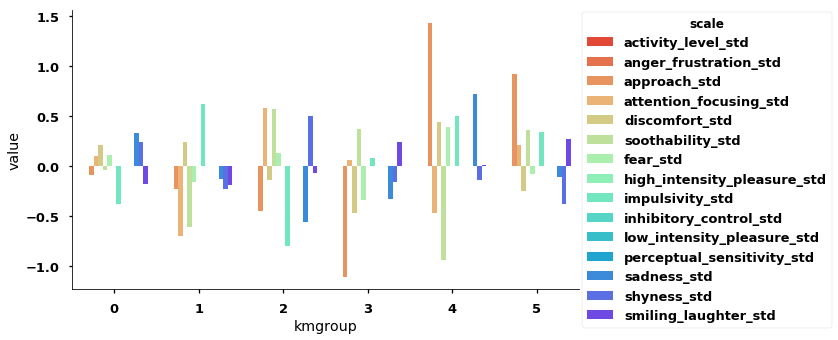

In [12]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
sns.set_context("talk")

long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                    value_vars=['activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))

sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
               kind='bar',size=5,palette='rainbow_r',legend=True, aspect=1.75, ci=None)
plt.savefig(project_home + str(n) + 'groups_plots.png',transparent=False)


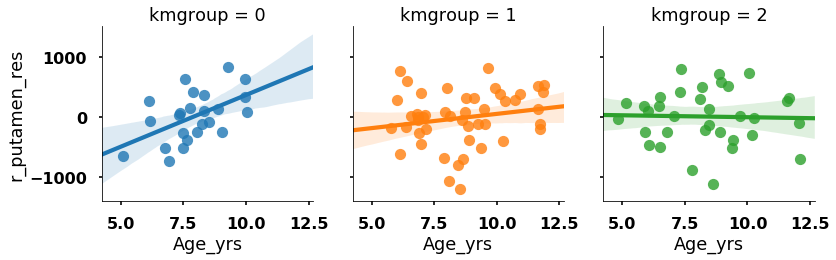

In [98]:
import seaborn as sns

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

data = read_csv(project_home + 'kmeans_group_data.csv', index_col=0)

sns.set_context("poster")
# Visualize results
#data.describe()

#plt.scatter(data['Age_yrs'],data['l_putamen_res'], c=data['kmgroup'])
sns.lmplot(x='Age_yrs',y='r_putamen_res', col='kmgroup', hue='kmgroup', data=data, 
           ci=95, size=4)
plt.savefig(project_home + 'r_putamen_age.png',transparent=True)
plt.show()

In [9]:
data.columns.values

array(['SubjectID', 'Age_yrs', 'male', 'sequence', 'eTIV', 'r_putamen',
       'l_putamen', 'r_pallidum', 'l_pallidum', 'r_caudate', 'l_caudate',
       'r_thalamus', 'l_thalamus', 'r_nacc', 'l_nacc', 'activity_level',
       'anger_frustration', 'approach', 'attention_focusing',
       'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
       'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
       'perceptual_sensitivity', 'sadness', 'shyness', 'smiling_laughter',
       'activity_level_std', 'anger_frustration_std', 'approach_std',
       'attention_focusing_std', 'discomfort_std', 'soothability_std',
       'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
       'inhibitory_control_std', 'low_intensity_pleasure_std',
       'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
       'smiling_laughter_std', 'kmgroup', 'r_putamen_res',
       'l_putamen_res', 'r_pallidum_res', 'l_pallidum_res',
       'r_caudate_res', 'l_caudate_res', 'r

In [8]:
from pandas import read_csv, DataFrame, Series

data = read_csv(project_home + 'kmeans_group_data.csv', index_col=0)
data.describe()

,Age_yrs,male,sequence,eTIV,r_putamen,l_putamen,r_pallidum,l_pallidum,r_caudate,l_caudate,...,r_putamen_res,l_putamen_res,r_pallidum_res,l_pallidum_res,r_caudate_res,l_caudate_res,r_nacc_res,l_nacc_res,CBCL_intern,CBCL_extern
count,111.000000,111.000000,111.000000,1.110000e+02,105.000000,106.000000,109.000000,107.000000,108.000000,106.000000,...,1.050000e+02,1.060000e+02,1.090000e+02,1.070000e+02,1.080000e+02,1.060000e+02,1.110000e+02,1.110000e+02,105.000000,105.000000
mean,8.312732,0.513514,1.765766,1.484405e+06,5424.980952,5419.838679,1925.454128,2010.455140,3999.745370,3869.219811,...,-1.904762e-07,-2.319319e-14,3.669725e-07,-4.672897e-07,-5.555556e-07,-4.716981e-07,3.603604e-07,-3.603604e-07,7.123810,10.390476
std,1.754863,0.502084,0.785724,1.425070e+05,590.474287,656.886635,259.239939,247.947702,533.577684,496.978192,...,4.433281e+02,5.133177e+02,2.089390e+02,2.002803e+02,4.045909e+02,4.050412e+02,7.928006e+01,8.635923e+01,8.913791,12.709396
min,4.840520,0.000000,1.000000,1.142335e+06,4038.400000,3556.100000,1396.600000,1585.200000,2726.100000,2531.100000,...,-1.198418e+03,-1.319434e+03,-4.451497e+02,-4.582661e+02,-9.560202e+02,-8.001761e+02,-1.797758e+02,-2.241786e+02,0.000000,0.000000
25%,6.950034,0.000000,1.000000,1.385205e+06,4959.700000,4977.550000,1746.900000,1806.850000,3671.450000,3604.825000,...,-2.494381e+02,-3.730210e+02,-1.488958e+02,-1.507310e+02,-2.924882e+02,-2.820375e+02,-5.877619e+01,-5.646268e+01,1.000000,1.000000
50%,8.221766,1.000000,2.000000,1.488072e+06,5405.400000,5462.500000,1893.200000,1991.800000,4048.900000,3868.800000,...,2.608966e+01,9.008757e+01,-3.065441e+01,-2.861940e+00,-1.061407e+01,-2.582820e+01,3.632530e+00,-1.235434e+01,4.000000,4.000000
75%,9.400411,1.000000,2.000000,1.577459e+06,5874.700000,5788.050000,2102.300000,2197.350000,4278.500000,4079.000000,...,3.133490e+02,3.363175e+02,1.370403e+02,1.413415e+02,2.516263e+02,2.643743e+02,5.228468e+01,5.522980e+01,10.000000,18.000000
max,12.084873,1.000000,3.000000,1.943317e+06,6926.400000,6961.200000,2656.300000,2712.700000,5360.700000,5236.000000,...,8.325999e+02,1.026731e+03,6.512491e+02,5.159346e+02,9.423300e+02,9.238201e+02,2.232307e+02,2.220827e+02,47.000000,46.000000


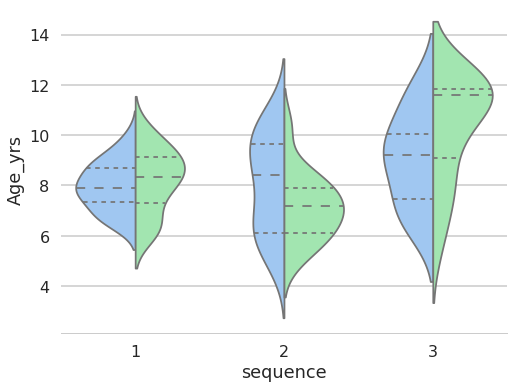

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style="whitegrid",  palette="pastel", color_codes=True)
sns.violinplot(x="sequence", y="Age_yrs", hue="male", data=data, split=True,
               inner="quart")
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(project_home + 'age_sex_sample.png')

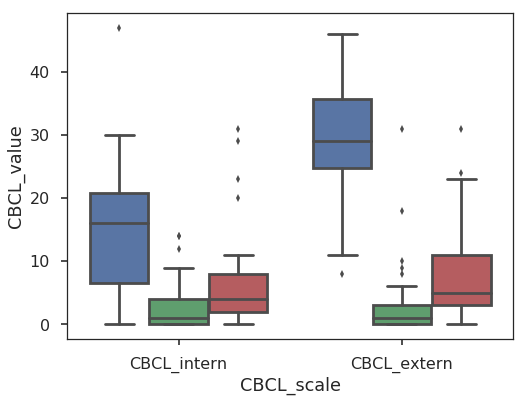

In [14]:
from pandas import melt
sns.set(style="ticks")
sns.set_context("poster")

long_cbcl = melt(data, id_vars=['SubjectID', 'Age_yrs', 'male', 'sequence', 'eTIV', 'r_putamen',
                                'l_putamen', 'r_pallidum', 'l_pallidum', 'r_caudate', 'l_caudate',
                                'r_thalamus', 'l_thalamus', 'r_nacc', 'l_nacc', 'activity_level',
                                'anger_frustration', 'approach', 'attention_focusing',
                                 'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
                                'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
                                'perceptual_sensitivity', 'sadness', 'shyness', 'smiling_laughter',
                                'activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std', 'kmgroup', 'r_putamen_res',
                                'l_putamen_res', 'r_pallidum_res', 'l_pallidum_res',
                                'r_caudate_res', 'l_caudate_res', 'r_nacc_res', 'l_nacc_res'],
                    value_vars=['CBCL_intern', 'CBCL_extern'], 
                    var_name='CBCL_scale',
                    value_name='CBCL_value')
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='CBCL_scale', y='CBCL_value', data=long_cbcl, hue='kmgroup')
ax.legend_.remove()
plt.savefig(project_home + 'cbcl_groups.png')